In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 1. solve PC

In [39]:
cov = np.array([[1.47, 0.65, 0.03],[0.65, 0.95, -0.18],[0.03, -0.18, 0.7]])
l = LA.eig(cov)[1]

In [40]:
l

array([[-0.82216865, -0.46240227,  0.33199827],
       [-0.56569001,  0.7287558 , -0.38588832],
       [ 0.06351003,  0.50507338,  0.86073652]])

# 2. RCT

In [41]:
data = pd.read_excel('./advertisementData.xlsx')
data.head()
data.shape
data.dtypes
data.describe()

,subjectNumber,exposureToAdvertisement,NumberOfClicks
0,1,0,19
1,2,0,8
2,3,1,104
3,4,0,3
4,5,1,108


(10000, 3)

subjectNumber              int64
exposureToAdvertisement    int64
NumberOfClicks             int64
dtype: object

,subjectNumber,exposureToAdvertisement,NumberOfClicks
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,0.198100,27.43380
std,2886.89568,0.398588,36.70107
min,1.00000,0.000000,0.00000
25%,2500.75000,0.000000,7.00000
50%,5000.50000,0.000000,10.00000
75%,7500.25000,0.000000,17.00000
max,10000.00000,1.000000,155.00000


In [42]:
data['subjectNumber'].value_counts

<bound method IndexOpsMixin.value_counts of 0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: subjectNumber, Length: 10000, dtype: int64>

In [43]:
y = data['NumberOfClicks']
x = data['exposureToAdvertisement']
lr = LinearRegression()

In [44]:
lr.fit(x.to_numpy().reshape(-1, 1), y)
coef = lr.coef_[0]
intercept = lr.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
residual = y - coef * x - intercept

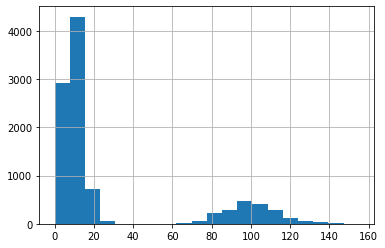

In [46]:
data['NumberOfClicks'].hist(bins=20)
plt.show()

In [47]:
data[(data['exposureToAdvertisement'] == 1)]['NumberOfClicks'].mean() - data[(data['exposureToAdvertisement'] == 0)]['NumberOfClicks'].mean()

90.21836779748048

In [48]:
N_treated = data['exposureToAdvertisement'].sum()
N = len(data)
N_controlled = N - N_treated

In [49]:
tStat = np.sqrt(N) * coef / np.sqrt( (N/N_treated + N/N_controlled) * residual.var() )
tStat

490.00568801044614

In [50]:
# a
print('a : %d, %d' %(N_controlled, N_treated))
# b
print('b : %.4f' %coef)
# c
print('c : %.4f' %tStat)

a : 8019, 1981
b : 90.2184
c : 490.0057


# 교수님 예제 데이터를 쓴다면..?

In [51]:
data = pd.read_excel('../RCT_fakeData.xlsx')
y = data['CoronaPositive']
x = data['vaccineTreatment']
lr = LinearRegression()
lr.fit(x.to_numpy().reshape(-1, 1), y)
coef = lr.coef_[0]
intercept = lr.intercept_
residual = y - coef * x - intercept
N_treated = data['vaccineTreatment'].sum()
N = len(data)
N_controlled = N - N_treated
tStat = np.sqrt(N) * coef / np.sqrt( (N/N_treated + N/N_controlled) * residual.var() )
tStat

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-34.94478792638119

일치.

# 3. Pair trading

In [83]:
data = pd.read_csv('./BRK.csv')
data.head()

,PERMNO,date,PRC
0,17778,20050103,87100.00000
1,17778,20050104,85901.00000
2,17778,20050105,85700.00000
3,17778,20050106,86192.00000
4,17778,20050107,87500.10156


In [84]:
data1 = data[(data['PERMNO'] == 17778)]
data2 = data[(data['PERMNO'] == 83443)]
data2.reset_index(drop = True, inplace = True)
data1.head()
data1.tail()
data2.head()
data2.tail()

,PERMNO,date,PRC
0,17778,20050103,87100.00000
1,17778,20050104,85901.00000
2,17778,20050105,85700.00000
3,17778,20050106,86192.00000
4,17778,20050107,87500.10156


,PERMNO,date,PRC
3770,17778,20191224,338389.90625
3771,17778,20191226,339650.00000
3772,17778,20191227,338920.00000
3773,17778,20191230,338750.00000
3774,17778,20191231,339590.00000


,PERMNO,date,PRC
0,83443,20050103,2899.0000
1,83443,20050104,2855.0000
2,83443,20050105,2860.0000
3,83443,20050106,2874.0000
4,83443,20050107,2918.8999


,PERMNO,date,PRC
3770,83443,20191224,225.47000
3771,83443,20191226,226.45000
3772,83443,20191227,226.14000
3773,83443,20191230,225.75999
3774,83443,20191231,226.50000


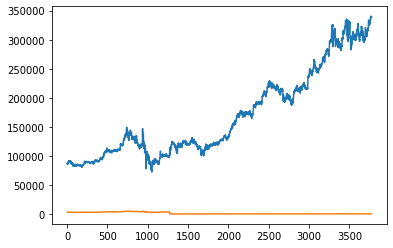

In [85]:
data1['PRC'].plot()
data2['PRC'].plot()
plt.show()

scale이 차이나서 잘안보임.

In [86]:
data1['PRC']
data2['PRC']

0        87100.00000
1        85901.00000
2        85700.00000
3        86192.00000
4        87500.10156
            ...     
3770    338389.90625
3771    339650.00000
3772    338920.00000
3773    338750.00000
3774    339590.00000
Name: PRC, Length: 3775, dtype: float64

0       2899.00000
1       2855.00000
2       2860.00000
3       2874.00000
4       2918.89990
           ...    
3770     225.47000
3771     226.45000
3772     226.14000
3773     225.75999
3774     226.50000
Name: PRC, Length: 3775, dtype: float64

(2,)

(3775, 2)

Text(0.5, 1.0, 'stationary process')

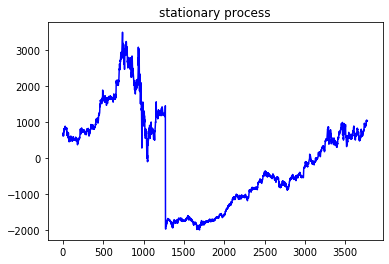

In [159]:
# Find a stationary relation
y = data2['PRC']
x = np.ones((len(y), 2))
x[:,1] = data1['PRC']
# lr = LinearRegression()
# lr.fit(x.to_numpy().reshape(-1,1), y)
# coef = lr.coef_
# intercept = lr.intercept_
coef = np.linalg.inv(x.T@x) @ (x.T@y)
# stationaryProcess = y-coef*x-intercept
stationaryProcess = y-x@coef
stationaryProcess.plot(color = 'blue')
plt.title('stationary process')
plt.show()
stationaryProcess = stationaryProcess.to_numpy()

In [184]:
# Error Correction Model
y = stationaryProcess[1:] - stationaryProcess[:-1]
x = np.ones((len(y),2))
x[:,1] = stationaryProcess[:-1] # n * 2
coef = np.linalg.inv(x.T@x) @ (x.T@y)


In [185]:
coef

array([ 0.09763536, -0.00154705])

In [186]:
# Error Correction Model
# y = stationaryProcess[1:] - stationaryProcess[:-1]
# x = stationaryProcess[:-1]


# x_ = np.ones((len(y),2))
# x_[:,1] = stationaryProcess[:-1] # n * 2
# coef_ = np.linalg.inv(x_.T@x_) @ (x_.T@y)

# lr = LinearRegression()
# lr.fit(x.reshape(-1,1), y)
# coef = lr.coef_
# intercept = lr.intercept_
residual = y - x @ coef
RV2ofResidual = np.zeros(len(residual))

for i in range(20, len(residual)):
    RV2ofResidual[i] = np.sum(residual[i-20:i] * residual[i-20:i])

In [187]:
# Mean-Variance Betting
# BettingResults = (stationaryProcess[1:] - stationaryProcess[:-1]) * (x * coef + intercept) / RV2ofResidual
BettingResults = (stationaryProcess[1:] - stationaryProcess[:-1]) * (x @ coef) / RV2ofResidual
BettingResults[20:]
BettingResults = BettingResults[20:]
realizedSR = np.sqrt(252) * BettingResults.mean() / BettingResults.std()
print('Sharpe ratio :', realizedSR)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 0.0005928 ,  0.00012357, -0.00106443, ...,  0.00094696,
        0.00026601, -0.00118683])

Sharpe ratio : 0.1839564115651763
